

# Project: Investigate a Dataset - [TMDB_Movies_Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data i have chosen to work with is TMBD Movie Data using the data analysis technique "Numpy, Pandas, and Matplotlib" TMBD refers to *the movie database*, this data is gotten from kaggle and contains 
information of about 10,000 movies. in this project i will be analyzing data associated with *movies*, in particular i will be interested in
finding trends in its ratings and the highest production rate over time.

these are the list of columns contained in the TMBD dataframe; ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj']) and the entire dataset duration runs through 1960-2015.
       
The aim of carrying out this analysis will be to answer the questions below by comapring variables, before the exploratory process i will walk through my dataset, i will try to identify missing values as well as understand my dataset by viewing the columns and rows, examine the types of data ``(Categorical and Numerical)``, with this in mind i will also find trends and patterns in this dataset by plotting variable types to identify if there exist positive or negative relationships between variable to answer the proposed questions, one interesting aspect of this project i look forward to, is using the pearsons r coffecient, to determine covariance and correlation relationship, with this been said i think its time to dig in and answer the questions below.


### Question(s) for Analysis

* what is the longest runtime of Movies in TMBD Dataset?
* which year had the Highest Average Voting?
* the 20 lengthy movies of tmdb dataset?
* what is the average runtime of movies?
* what properties are associated with highly rated movies?
* How many Movies of each Genre was created in TMDB dataset?

<a id='wrangling'></a>
## Data Wrangling

Performing the data wrangling process, the basic steps are to quickly go through the dataset to find unnecessary values, null or duplicated values, and make decisions for data clearing.


# The first step

import all libraries that will be used to perform my analysis and find the dimensions of the dataframe also the df.head() prints out the first five rows of the dataset. ``i had to import os and change directory because i was unable to access my file on my local machine at first.``

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\DELL\\Downloads'

In [3]:
os.chdir('C:\\Users\\DELL\\Downloads')

In [46]:
#importing all the necessary libraries to be used for my analysis.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from scipy.stats import expon




* i am import scipy to enable me use the documentation of the pandas library.

In [47]:
#reading the data from my local machine 
mvs_df = pd.read_csv('tmdb_movies_data.csv')
mvs_df.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


**Before going further i would like to comment on the use of variable name for this dataset, i intially used movies_df as my variable name but changed it to ``MVS_df`` which still stands for movies dataframe after going through the W3school site as instructed.**

In [4]:
#displaying the tail of the dataset just to check it
mvs_df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


## My observation from the data set ##
*we can see that the data above is quite neat but the following columns contain string values and that are seperated with (|) character. i would most likely seperate the columns to retrieve the information i want to use. the columns budget and revenue adj has a couple of zero(o) values.*

**To check the shape of the dataset, set is not a method but an attribute and it prints out tuple of the dataset showing its rows and columns** 

In [31]:
`mvs_df.shape

(10866, 21)

**To get information about the dataset, like the number of columns, total number of rows, data types of each columns and memory requirement, Now i will inspect the data type to get more information like the number of null values, missing data,As seen below the movie dataset contains 10866 rows and 21 columns** 

In [32]:
# to get the information of the movie data set, its entries, data type etc
mvs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

from the display above, we can see that there are a total of 10866 entries and 21 columns. there are some null values in the  ***cast, director, overview and genres*** columns, i will drop them, however there are alot of null values in columns. **"homepage, tagline, keywords and production companies".** 
With this information i can now tell which column is not so important to my analysis process and i will look into filling the null values of the data set, so lets jump right into it.

In [33]:
# With what we have seen above lets check for missing values 
mvs_df.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Although the isnull() method shows the boolean, using True for values that are ``Null values`` and False for the reverse, this tells us if there are missing/null values or not we cant really know how many values are missing until we find the sum

In [57]:
mvs_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* Now we see the numbers of missing/null values in our dataset

In [35]:
mvs_df.count()

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

*the df.count shows the number of non-empty values of each row in a dataframe.*

In [36]:
mvs_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

*df.dtypes returns the types of columns in the dataframe*

In [58]:
mvs_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [63]:
mvs_df['genres'].value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [52]:
mvs_df.fillna('Comedy', inplace = True)

In [53]:
mvs_df['genres'].isnull().sum()

0

In [65]:
mvs_df['production_companies'].value_counts()

Paramount Pictures                       156
Universal Pictures                       133
Warner Bros.                              84
Walt Disney Pictures                      76
Columbia Pictures                         72
                                        ... 
Silverwood Films                           1
Lunch Box Entertainment                    1
Atitude ProduÃ§Ãµes e Empreendimentos      1
Mulmur Feed Company                        1
Norm-Iris                                  1
Name: production_companies, Length: 7445, dtype: int64

In [6]:
mvs_df['production_companies'].fillna('Paramount Pictures', inplace  = True)

In [7]:
mvs_df['production_companies'].isnull().sum()

0

**As seen above i used the describe method to display the summary statistics of my dataframe, i was actually looking out for columns with missing values, and i noticed that my missing values are mainly categorical variable types, the numerical variable types dont have missing varables, so to fill the null values as instructed i would like to concerntrate on the columns that are useful to me in this analysis since i will be dropping the rest of the columns which i wont be using for my analysis.
*As we can see the genres columns has two genre types occuring most frequently, ``Comedy and Drama``*Now we can also see that under the production companies the most occuring value is the ``paramount pictures``, so i will fill the null values with the mode of the genres and the production companies respectively** 

# Data Cleaning

Now i will start off by addressing the zero values in budget and revenue data, for this i will use ``query`` to filter the revenue and budget data in my data frame.

In [11]:
#To filter the error(0) budget data 
movies_bug = mvs_df.query("budget == 0")
movies_bug= mvs_df.head(10)


**Google actually gives me a budget of 6.1 million dollars for the movie high-rise, from this finding i believe that the 0 data is significantly missing data from the dataset, with further investigation i will decide if i would drop these rows with 0 values**

In [13]:
#To filter the error(0) budget data 
movie_rev_zero = mvs_df_rev= mvs_df.query("revenue == 0")
movie_rev_zero.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0


**the same result for Revenue.**

* Before i drop the values i would like to check and see the count of zero values in the both columns investigated above 

In [14]:
movie_bgt_count= mvs_df.groupby('budget').count()['id']
movie_bgt_count.head(10)

budget
0     5696
1        4
2        1
3        3
5        1
6        1
8        3
10       6
11       1
12       2
Name: id, dtype: int64

**there are about 5696 zero values in the rows of my data set. lets check the revenue column, i will copy and paste my previous code and just modify the name of the column**

In [16]:
movie_bgt_count= mvs_df.groupby('revenue').count()['id']
movie_bgt_count.head(10)

revenue
0     6016
2        2
3        3
5        2
6        2
9        2
10       1
11       3
12       1
13       2
Name: id, dtype: int64

**its almost the same, here we have 6016 zero values in the revenue rows.**

In [17]:
#i will also like to check the zero values in Runtime Columns as this is one of my variables
movie_bgt_count= mvs_df.groupby('runtime').count()['id']
movie_bgt_count.head(10)

runtime
0     31
2      5
3     11
4     17
5     17
6     22
7     17
8      9
9      7
10     6
Name: id, dtype: int64

```compared to the previous values this has 31 zero values which is quite small against 6,000```

In [18]:
# lets check the sum of the missing values
mvs_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

*Now we can see that there are missing values under the columns ``imdb id,cast, tagline, homepage, keywords, production_companies`` although i haven't determined what columns i will drop which wont be useful to my analysis, i can also visualize this with seaborn to check the columns with missing values, i wont be doing that so over to the next*

In [31]:
# now let me drop rows that contain missing values
df.dropna(axis = 0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,James Bond tracks archnemesis Ernst Blofeld to...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969,4.160985e+07,4.872780e+08
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,"A psychotic murderer, institutionalized since ...",91,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978,1.002810e+06,2.339890e+08
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,"At a 1962 College, Dean Vernon Wormer is deter...",109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,Martin Scorsese's rockumentary intertwines foo...,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978,0.000000e+00,1.076189e+06


**now that we have dropped missing values let us find duplicate values in the data set**

In [32]:
# to find the duplicate values of my dataset 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool


*the movie dataset has no duplicate values as all rows display false*

**After inspecting the dataset i have found certain columns that wont be needed.**
* i probably wont be needing ``'imbd id','home page','tagline','overview','budget_adj','revenue_adj`` so lets drop them.

In [75]:
df.drop(['imdb_id','homepage', 'tagline', 'budget_adj', 'overview', 'revenue_adj'], axis = 1, inplace =True)

In [76]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


## Overall Statistics of my dataframe 

In [77]:
# having checked all this i would now look at the summary statistics of my dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


**df.describe shows a summary statistics of my dataframe.**  *As we can see above the statistics of my dataset is displayed. we can see that the minimum release year of my dataset is 1960, and the maximum release year is 2015, and the minimum runtime of movies of my data set is 90 minutues and 25th quantile and the maximum runtime of my data set is 900minutes. we can find outliers in **popularity column** the maximum value is 32,985763 while the minimum value is 0.000065 and other quatiles are around the value 0.2 to 0.7*

In [78]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the average Movie runtime?)

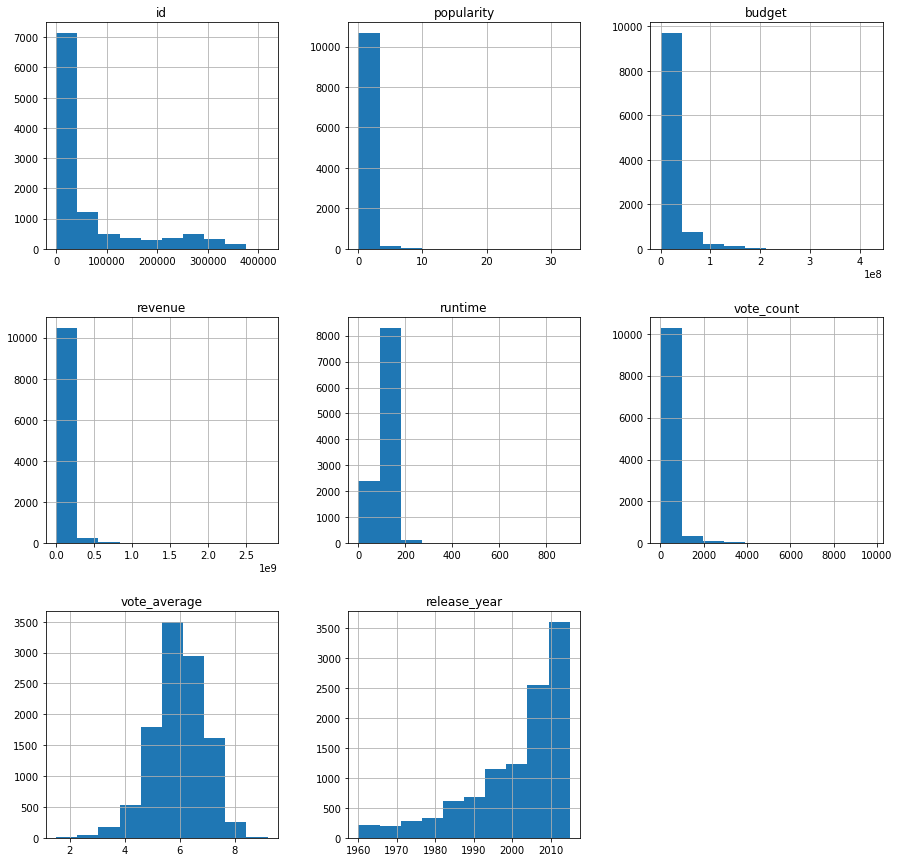

In [80]:
#Here i had to look at the histogram of the entire dataset to identify the variation of my dataset
df.hist(figsize=(15,15));

* As seen above the values of some columns are skewed to the left such as release year and the rest seem to be skewed to the right except vote average which seems to have a normal distribution

## Question 1

### what is the longest runtime of Movies in TMBD Dataset?

In [31]:
# i would like to display movie title with minutes >= 90minutes
mvs_df[mvs_df['runtime']>= 900] ['original_title']

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object

In [30]:
mvs_df['runtime']

0        124
1        120
2        119
3        136
4        137
        ... 
10861     95
10862    176
10863     94
10864     80
10865     74
Name: runtime, Length: 10866, dtype: int64

In [32]:
mvs_df['runtime'].mean()

102.07086324314375

**ok so for some reason i get the highest runtime of movies as 900 minutes and converting that to hours is 37.5hours, funny right! what movie can span over a day and 13hours 5minutes, and the mean of the runtime returns 102minutes**

## Question 2

### which year had the Highest Average Voting?

In [50]:
## which year had the Highest Average Voting?
mvs_df.groupby('release_year')['vote_average'].mean()

release_year
1960    6.325000
1961    6.374194
1962    6.343750
1963    6.329412
1964    6.211905
1965    6.194286
1966    6.128261
1967    6.242500
1968    6.379487
1969    5.961290
1970    6.417073
1971    6.420000
1972    6.535000
1973    6.703636
1974    6.395745
1975    6.390909
1976    6.340426
1977    6.147368
1978    6.130769
1979    6.308772
1980    6.160256
1981    6.165854
1982    6.241975
1983    5.971250
1984    6.003810
1985    6.177064
1986    6.004959
1987    6.128800
1988    5.965517
1989    6.070073
1990    5.993939
1991    6.014286
1992    6.081203
1993    6.050000
1994    5.942391
1995    6.056000
1996    5.900980
1997    5.988542
1998    5.970476
1999    6.032589
2000    5.882379
2001    5.896281
2002    5.973308
2003    5.930961
2004    5.988599
2005    5.866484
2006    5.941422
2007    5.964384
2008    5.930847
2009    5.856660
2010    5.990816
2011    5.958519
2012    5.799830
2013    5.880577
2014    5.920714
2015    5.885692
Name: vote_average, dtype: float64

In [56]:
# for the question i need to find the year that has the highest avearage rating but i will like to see the values by descending order
mvs_df.groupby('release_year')['vote_average'].mean().sort_values(ascending=False)

release_year
1973    6.703636
1972    6.535000
1971    6.420000
1970    6.417073
1974    6.395745
1975    6.390909
1968    6.379487
1961    6.374194
1962    6.343750
1976    6.340426
1963    6.329412
1960    6.325000
1979    6.308772
1967    6.242500
1982    6.241975
1964    6.211905
1965    6.194286
1985    6.177064
1981    6.165854
1980    6.160256
1977    6.147368
1978    6.130769
1987    6.128800
1966    6.128261
1992    6.081203
1989    6.070073
1995    6.056000
1993    6.050000
1999    6.032589
1991    6.014286
1986    6.004959
1984    6.003810
1990    5.993939
2010    5.990816
2004    5.988599
1997    5.988542
2002    5.973308
1983    5.971250
1998    5.970476
1988    5.965517
2007    5.964384
1969    5.961290
2011    5.958519
1994    5.942391
2006    5.941422
2003    5.930961
2008    5.930847
2014    5.920714
1996    5.900980
2001    5.896281
2015    5.885692
2000    5.882379
2013    5.880577
2005    5.866484
2009    5.856660
2012    5.799830
Name: vote_average, dtype: float64

Text(0.5, 1.0, 'vote by year')

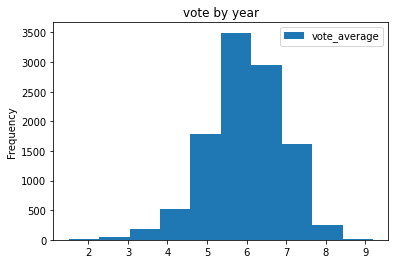

In [73]:
df.plot(x='release_year', y='vote_average', kind ='hist')
plt.title('vote by year') 

In [60]:
df.quantile()

id              20669.000000
popularity          0.383856
budget              0.000000
revenue             0.000000
runtime            99.000000
vote_count         38.000000
vote_average        6.000000
release_year     2006.000000
budget_adj          0.000000
revenue_adj         0.000000
Name: 0.5, dtype: float64

In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

## Question 3
### the 20 lengthy movies of tmdb dataset?

In [74]:
#the 20 lengthy movies of tmdb dataset
movies_len=mvs_df.nlargest(20, 'runtime')[['original_title','runtime']]\
.set_index('original_title')

In [75]:
# i had to set the original title of the data frame as my index in order to see the runtime of the lengthiest movies, but i will assign this to a varaible and then visualize it
movies_len

,runtime
original_title,
The Story of Film: An Odyssey,900
Taken,877
Band of Brothers,705
Shoah,566
"North and South, Book I",561
Planet Earth,550
The Pacific,540
John Adams,501
Life,500


<AxesSubplot:xlabel='runtime', ylabel='original_title'>

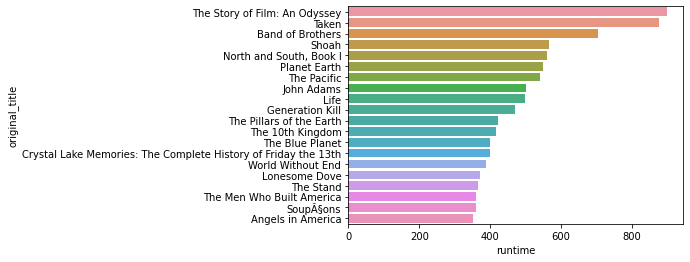

In [76]:
sns.barplot(x= 'runtime', y =movies_len.index, data =movies_len)

i used the seaborn plot function to visualize the runtime and movies categories, here we can see that the movie with the highest runtime remains ``Odyssey``, while the movie with the shortest runtime is ``Angels in America``

## Question 4
### what is the average runtime of movies?

In [ ]:
# to check the runtime of movies 
movies_df = mvs_df.runtime.mean()
movies_df.mean()

In [ ]:
#sort the movies dataframe by the duration 
m_sort= mvs_df.sort_values(by=['runtime'], ascending = False)
m_sort.head()

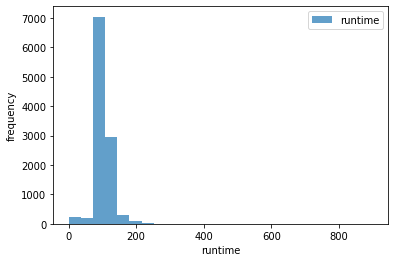

In [101]:
#to visualize 
df.runtime.plot(kind = 'hist', bins =25, label = 'runtime', alpha= .7)
plt.xlabel('runtime')
plt.ylabel ('frequency')
plt.legend();

*Here we can see that most of the movies have a duration between 100 and 140, we can also visualize with blox plot*

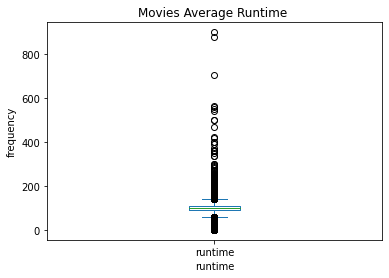

In [20]:
#to visualize 
df.runtime.plot(kind = 'box', label = 'runtime')
plt.title('Movies Average Runtime ')
plt.xlabel('runtime')
plt.ylabel ('frequency')
plt.show()

In [45]:
df['popularity'].max()

32.985763

In [46]:
df['popularity'].min()

6.5e-05

In [48]:
df['popularity'].describe


<bound method NDFrame.describe of 0        32.985763
1        28.419936
2        13.112507
3        11.173104
4         9.335014
           ...    
10861     0.080598
10862     0.065543
10863     0.065141
10864     0.064317
10865     0.035919
Name: popularity, Length: 10866, dtype: float64>

## Question 5
### what properties are associated with highly rated movies?

In [19]:
def corr_c(mvs_df, x, y):
    x_bar = mvs_df[x].mean()  # means of the two columns 
    y_bar = mvs_df[y].mean()
    
#     Args:
           (mvs_df) Movies _dataframe
    
    #to calculate the standard deviation of the 2 columns 
    x_sd = mvs_df[x].std()
    y_sd = mvs_df[y].std()
    
#     to standardize the columns and multiply and sum all the products 
    total_prod = (((mvs_df[x]-x_bar)/x_sd)*((mvs_df[y]-y_bar)/y_sd)).sum()
    
    corr = total_prod/(mvs_df.shape[0]-1)
    
    return corr
    

i defined a function to Apply the correlation coefficient formula to identify the relationship of any two variables of my dataset for further analysis. the ``corr_c stands`` for correlation coefficient.

In [20]:
corr_c(mvs_df, 'vote_average','popularity')

0.20951130747540359

In [25]:
mvs_df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


**The corr() function automatically gives a pearsons correlation coefficient of variables, the correlation coefficient ``0.21`` of popularity and vote average indactes a negative relationship**

Although there are 2 rows that could determine the rating of movies, which are **"popularity and Vote_average"**, i will plot and visualization against to the two variable to determine which will can be used to answer my question above. 

In [50]:
mvs_df.groupby(['vote_average'])['popularity'].mean().sort_values(ascending = False)

vote_average
8.1    2.423125
8.0    2.033001
7.9    2.031253
7.6    1.595906
7.8    1.500604
         ...   
2.0    0.079281
1.5    0.078520
8.6    0.067753
2.2    0.051765
9.2    0.006925
Name: popularity, Length: 72, dtype: float64

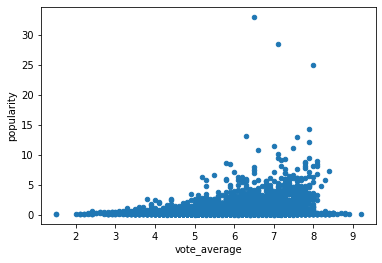

In [31]:
df.plot(x='vote_average', y= 'popularity', kind='scatter')
plt.title = ('comparison of vote_average and popularity')
plt.show()

*Although we know that the box plot shows the relationship between numerical and categorical data, i would like to determine the outliers of the both columns*.

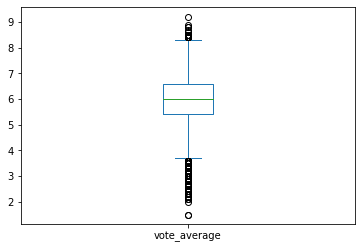

In [24]:
#for the Vote_average, i will create a box plot
df['vote_average'].plot (kind ='box')
plt.show()

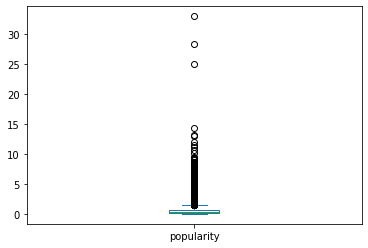

In [26]:
#for the popularity, i will create a box plot
df['popularity'].plot(kind= 'box')
plt.show()

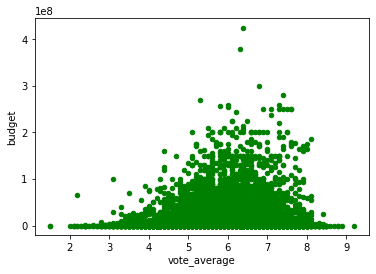

In [36]:
df.plot(x='vote_average',y='budget',kind='scatter', color = 'green')
plt.show()

**Here the scatter plot displays a positive correlation, so the movie that have high budgets are more likely to be voted by the audience**

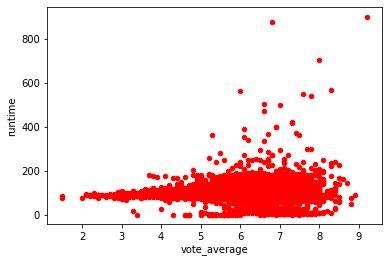

In [35]:
df.plot(x='vote_average',y='runtime',kind='scatter', color = 'red')
plt.show()


**the Scatter plot above also displays a positive correlation(the comparison of vote_average and revenue), this means that more revenue is made by movies that have high vote count from its audience**

**In the above cell i plotted the popularity variable against the movie genres to see the rating of the movies, as we can see with the box plot above vote_average has less outliers than popularity and shows a stronger relationship so i decided to use the vote average** 



## Question 6
### How many Movies of each Genre was created in TMDB dataset

In [101]:
df_1=[]
for value in mvs_df['genres']:
    df_1.append(value.split('|'))


In [102]:
df_1

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Western', 'Drama', 'Adventure', 'Thriller'],
 ['Science Fiction', 'Action', 'Thriller', 'Adventure'],
 ['Drama', 'Adventure', 'Science Fiction'],
 ['Family', 'Animation', 'Adventure', 'Comedy'],
 ['Comedy', 'Animation', 'Family'],
 ['Action', 'Adventure', 'Crime'],
 ['Science Fiction', 'Fantasy', 'Action', 'Adventure'],
 ['Drama', 'Science Fiction'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Crime', 'Drama', 'Mystery', 'Western'],
 ['Crime', 'Action', 'Thriller'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Romance', 'Fantasy', 'Family', 'Drama'],
 ['War', 'Adventure', 'Science Fiction'],
 ['Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery'],
 ['Action', 'Drama'],
 ['Action'

To answer this question i first thought of defining a function that would split the genres that had a ``(|)`` seperator, so that i could append them in a seperate list and perform my analysis

In [103]:
df_1d = []
for item in df_1:
    for item1 in item:
        df_1d.append(item1)

In [104]:
df_1d

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Crime',
 'Thriller',
 'Western',
 'Drama',
 'Adventure',
 'Thriller',
 'Science Fiction',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Adventure',
 'Science Fiction',
 'Family',
 'Animation',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Crime',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Science Fiction',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Science Fiction',
 'Crime',
 'Drama',
 'Mystery',
 'Western',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Action',
 'Adventure',
 'Romance',
 'Fantasy',
 'Family',
 'Drama',
 'War',
 'Adventure',
 'Science Fiction',
 'Action',
 'Family',
 'Science Fiction',
 'Adventure',
 'Mystery',
 'Action',
 'Drama',
 

The above function was created to append the items in the genres column to a 1 dimensional list so that i can perform the next operation below which is to count the number of movies created according to the genres

In [105]:
u_list=[]  #this represents unique list
for item in df_1d:
    if item not in u_list:
        u_list.append(item)

In [108]:
u_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

In [107]:
len(u_list)

20

the above function i used to append the specific genres i have split to a list i named unique list so that i could find the length of the unique items and also perform the next operation.

In [110]:
from collections import Counter

In [112]:
Counter(df_1d)

Counter({'Action': 2385,
         'Adventure': 1471,
         'Science Fiction': 1230,
         'Thriller': 2908,
         'Fantasy': 916,
         'Crime': 1355,
         'Western': 165,
         'Drama': 4761,
         'Family': 1231,
         'Animation': 699,
         'Comedy': 3816,
         'Mystery': 810,
         'Romance': 1712,
         'War': 270,
         'History': 334,
         'Music': 408,
         'Horror': 1637,
         'Documentary': 520,
         'TV Movie': 167,
         'Foreign': 188})

i want to find out how many movies were created, to do this i had to first import the counter function from the collections library,this enabled me to display the number of movies released according to the genre and as we can see action movies created were 2385, same goes for other genres

<a id='conclusions'></a>
## Conclusions

At the start of my research, I looked into the question "the longest runtime of movies," and the answer was that the average runtime of movies was 100-140 minutes. After cleaning and trimming the dataset by removing unnecessary, null, and duplicated values,my second task was to find out which year had the highest movie, Then I created a few charts to determine whether popularity or vote average amongst others will be used as the dependent variable. Because the vote average was more evenly distributed, I used it as the variable that indicates viewer favorability. Because my analysis only shows correlations between variables, I cannot definitively say whether any trait can predict a movie's vote average. This would necessitate more in-depth statistical analysis, which was not carried out in this project.

Finally my limitations was my inability to use certain functions like iterrating through rows as i am still new to the programming language, Nevertheless i must endevour to practice, some codes were also new to me, aside the data wrangling and cleaning process, although with the help of google and stackoverflow i was able to perform what i could, also the very short timing to be able to investigate the dataset further, and also little complications with loading the the ipynb in my local machine, this made my journey abit gruesome as i had to find out how to use the os function to find directories and also install the likes of panda which was already installed in my local machine. to cut it all short my major limitation was timing. 

if i may add, my limitations would probably be to long to read, but i really had a tough time trying to use the example posed by my reviewer, please forgive any mistakes found i think i am abit drousy as i have toiled through the night to change certain questions and i really really found it difficult to replicate the pearsons r coefficient example you posed to me and the example of creating the genres id and plotting the box plot, i am not saying i am right but asking for pardon as i havent really gotten so strong in this and will not rest until i understand it.



In [102]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295